<a href="https://colab.research.google.com/github/tyzp-INC/beach_demand_forecast/blob/main/Colab%20Prophet%20Forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import os

##PATH_CSV = ''

df_sales = pd.read_csv('sales_train.csv')
df_items = pd.read_csv('items.csv')
df_resturants = pd.read_csv('resturants.csv')

df_sales.date = pd.to_datetime(df_sales.date, errors= 'coerce')

In [9]:
import plotly.express as px

df_plot = df_sales[['date', 'item_count']].groupby(['date']).sum().reset_index()
fig = px.line(df_plot, x = 'date', y = 'item_count', title = 'Total Sales by Date')
fig.show()

In [10]:
from prophet import Prophet

df_plot.columns = ['ds', 'y']
m = Prophet()
m.fit(df_plot)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcd2u8r6l/4k58e8ix.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcd2u8r6l/7pn0w0cu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17674', 'data', 'file=/tmp/tmpcd2u8r6l/4k58e8ix.json', 'init=/tmp/tmpcd2u8r6l/7pn0w0cu.json', 'output', 'file=/tmp/tmpcd2u8r6l/prophet_modele2q5pd9p/prophet_model-20230211112015.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:20:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:20:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [11]:
future = m.make_future_dataframe(periods= 365)
future.tail()

,ds
1456,2022-12-27
1457,2022-12-28
1458,2022-12-29
1459,2022-12-30
1460,2022-12-31


In [12]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1456,2022-12-27,372.663944,314.172070,431.664082
1457,2022-12-28,429.690867,372.243057,486.658193
1458,2022-12-29,612.801047,551.519125,670.517261
1459,2022-12-30,736.641994,676.725271,798.635849
1460,2022-12-31,737.621618,674.783556,801.497955


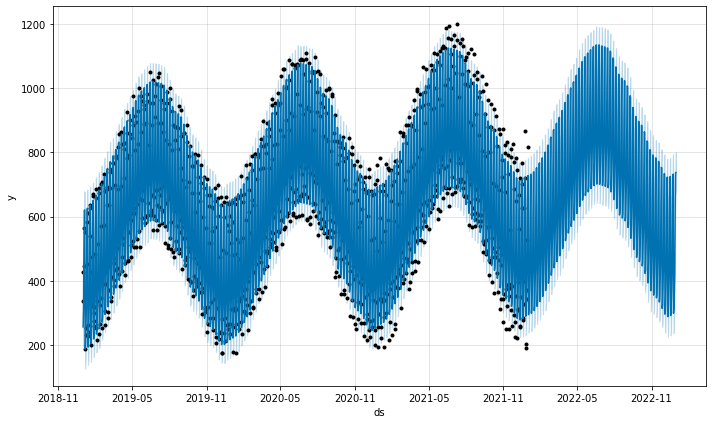

In [13]:
fig1 = m.plot(forecast)

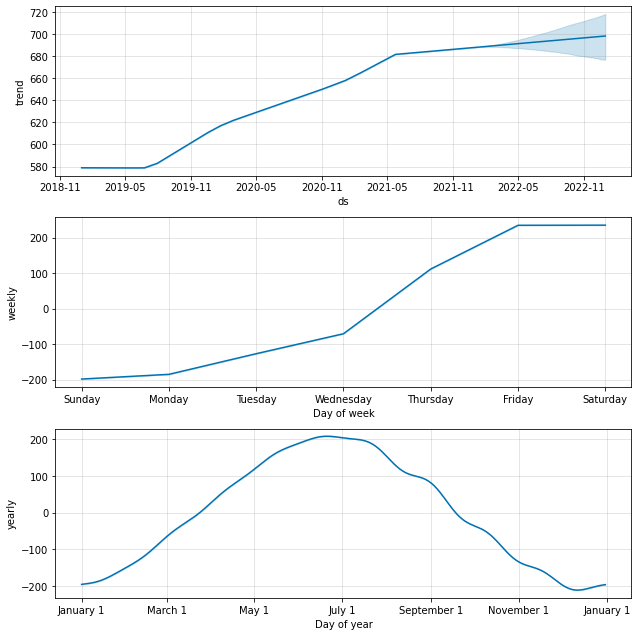

In [14]:
fig2 = m.plot_components(forecast)

In [15]:
from prophet.plot import plot_plotly, plot_components_plotly
plot_plotly(m, forecast)